This notebook is based on the notebook format from the youtube series by Jonathan Soma "Introduction to geopandas"

The data within this notebook is from the City of Torontos Open Data set.

In [138]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon

#see all columns when calling head on a dataframe
pd.set_option('display.max_columns', None)

from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#Tell matplot lib to generate plots inline, within the notebook
%matplotlib inline

<Axes: >

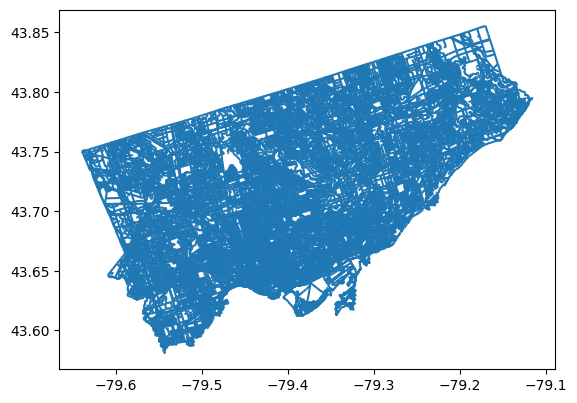

In [139]:
shape_path = "/workspace/GIS_project/data/Centreline - Version 2 - 4326/Centreline - Version 2 - 4326.shp"
centreline = gpd.read_file(shape_path)
centreline.plot()

In [140]:
centreline.head()

,_id1,CENTREL2,LINEAR_3,LINEAR_4,LINEAR_5,ADDRESS6,ADDRESS7,PARITY_8,PARITY_9,LO_NUM_10,HI_NUM_11,LO_NUM_12,HI_NUM_13,BEGIN_A14,END_ADD15,BEGIN_A16,END_ADD17,BEGIN_A18,END_ADD19,BEGIN_A20,END_ADD21,LOW_NUM22,HIGH_NU23,LOW_NUM24,HIGH_NU25,LINEAR_26,LINEAR_27,LINEAR_28,LINEAR_29,LINEAR_30,FROM_IN31,TO_INTE32,ONEWAY_33,ONEWAY_34,FEATURE35,FEATURE36,JURISDI37,CENTREL38,OBJECTI39,MI_PRIN40,geometry
0,1,914600,2141,Morrison St,Morrison Street,None,None,N,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Morrison,St,None,ET,Morrison St,13470555,13470560,0,Not One-Way,201500,Local,CITY OF TORONTO,None,1,1,"LINESTRING (-79.50875 43.59744, -79.50987 43.5..."
1,2,914601,2666,Twelfth St,Twelfth Street,66-92,65-89,E,O,66,92,65,89,1040061,1040085,1040060,1040082,66,92,65,89,65,89,66,92,Twelfth,St,None,None,Twelfth St,13470560,13470530,0,Not One-Way,201500,Local,CITY OF TORONTO,None,2,2,"LINESTRING (-79.50987 43.5972, -79.51035 43.59..."
2,3,7862398,2611,Thirteenth St,Thirteenth Street,66-96,65-91,E,O,66,96,65,91,7862400,7862422,7862399,7862415,66,96,65,91,65,91,66,96,Thirteenth,St,None,None,Thirteenth St,13470571,13470538,0,Not One-Way,201500,Local,CITY OF TORONTO,None,3,3,"LINESTRING (-79.51087 43.59697, -79.51134 43.5..."
3,4,914587,1962,Lake Shore Blvd W,Lake Shore Boulevard West,None,3180-3180,N,E,0,0,3180,3180,0,0,1013460,1013460,0,0,3180,3180,0,0,3180,3180,Lake Shore,Blvd,W,None,Lake Shore Blvd W,13470546,13470552,0,Not One-Way,201200,Major Arterial,CITY OF TORONTO,None,6,6,"LINESTRING (-79.51805 43.59795, -79.51914 43.5..."
4,5,6735911,1962,Lake Shore Blvd W,Lake Shore Boulevard West,3197-3197,3190-3190,O,E,3197,3197,3190,3190,6735910,6735910,6735913,6735913,3197,3197,3190,3190,3197,3197,3190,3190,Lake Shore,Blvd,W,None,Lake Shore Blvd W,13470552,13470558,0,Not One-Way,201200,Major Arterial,CITY OF TORONTO,None,7,7,"LINESTRING (-79.51914 43.5977, -79.52024 43.59..."


In [141]:
#We only want non motorway roads. So find feature types, and select the ones we want
centreline.FEATURE36.unique()


array(['Local', 'Major Arterial', 'River', 'Geostatistical line',
       'Major Shoreline', 'Collector', 'Minor Arterial', 'Major Railway',
       'Expressway', 'Laneway', 'Expressway Ramp', 'Pending',
       'Major Arterial Ramp', 'Other', 'Hydro Line', 'Walkway',
       'Minor Shoreline (Land locked)', 'Minor Railway', 'Trail',
       'Creek/Tributary', 'Collector Ramp', 'Busway', 'Ferry Route',
       'Access Road', 'Other Ramp', 'Minor Arterial Ramp'], dtype=object)

In [142]:
road_list = ['Local', 'Major Arterial', 'Major Arterial Ramp', 'Collector', 'Collector Ramp', 'Minor Arterial', 'Minor Arterial Ramp']
roads = centreline.query('FEATURE36 in @road_list')
roads = roads[['CENTREL2', 'LINEAR_3', 'LINEAR_4','LINEAR_5', 'LINEAR_26',
                'LINEAR_26', 'LINEAR_30', 'FROM_IN31', 'TO_INTE32', 'FEATURE35',
                'FEATURE36', 'JURISDI37', 'OBJECTI39', 'MI_PRIN40', 'geometry']]
roads.head()

,CENTREL2,LINEAR_3,LINEAR_4,LINEAR_5,LINEAR_26,LINEAR_26,LINEAR_30,FROM_IN31,TO_INTE32,FEATURE35,FEATURE36,JURISDI37,OBJECTI39,MI_PRIN40,geometry
0,914600,2141,Morrison St,Morrison Street,Morrison,Morrison,Morrison St,13470555,13470560,201500,Local,CITY OF TORONTO,1,1,"LINESTRING (-79.50875 43.59744, -79.50987 43.5..."
1,914601,2666,Twelfth St,Twelfth Street,Twelfth,Twelfth,Twelfth St,13470560,13470530,201500,Local,CITY OF TORONTO,2,2,"LINESTRING (-79.50987 43.5972, -79.51035 43.59..."
2,7862398,2611,Thirteenth St,Thirteenth Street,Thirteenth,Thirteenth,Thirteenth St,13470571,13470538,201500,Local,CITY OF TORONTO,3,3,"LINESTRING (-79.51087 43.59697, -79.51134 43.5..."
3,914587,1962,Lake Shore Blvd W,Lake Shore Boulevard West,Lake Shore,Lake Shore,Lake Shore Blvd W,13470546,13470552,201200,Major Arterial,CITY OF TORONTO,6,6,"LINESTRING (-79.51805 43.59795, -79.51914 43.5..."
4,6735911,1962,Lake Shore Blvd W,Lake Shore Boulevard West,Lake Shore,Lake Shore,Lake Shore Blvd W,13470552,13470558,201200,Major Arterial,CITY OF TORONTO,7,7,"LINESTRING (-79.51914 43.5977, -79.52024 43.59..."


<Axes: >

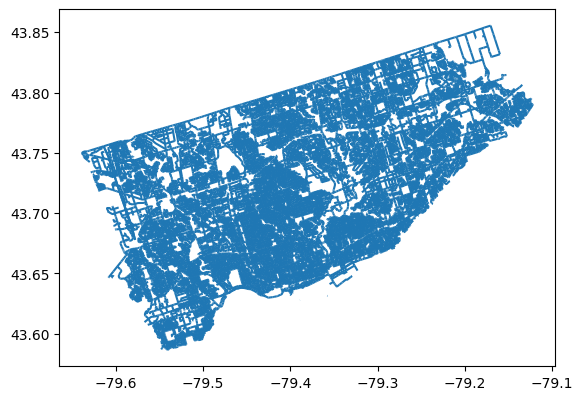

: 

In [143]:
roads.plot()

In [144]:
#read shapefiles
file_path_1 = "/workspace/GIS_project/data/traffic/raw-data-2010-2019.csv"
file_path_2 = "/workspace/GIS_project/data/traffic/raw-data-2010-2019.csv"
file_path_3 = "/workspace/GIS_project/data/traffic/raw-data-2020-2029.csv"
#combine the csvs into a single dataframe
traffic = pd.concat(
    map(pd.read_csv, [file_path_1, file_path_2, file_path_3]), ignore_index=True)
#display head data
traffic.head()

In [ ]:
#calculate new field that adds up all motor traffic
traffic['motortraf'] = traffic.loc[:,'sb_cars_r':'eb_bus_l'].sum(axis=1) + traffic.loc[:,'nx_other':'wx_other'].sum(axis=1)
#create a year field
traffic['year'] = pd.to_datetime(traffic['count_date']).dt.year

#new, cleaner, dataframe
traffic_trunc = traffic[['count_id', 'year', 'location_id', 'location', 'lng', 'lat', 'centreline_type', 'centreline_id', 'motortraf']]
traffic_trunc.head()

,count_id,year,location_id,location,lng,lat,centreline_type,centreline_id,motortraf
0,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,94.0
1,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,128.0
2,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,113.0
3,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,142.0
4,25081,2010,32187,LILLIAN ST AT SOUDAN AVE,-79.393259,43.705283,2.0,13457294.0,140.0


In [ ]:
#aggregate and group by year and location id
traffic_agg = traffic_trunc.groupby(['year','location_id']).agg({'count_id': pd.Series.mode,
                                                              'location': pd.Series.mode,
                                                              'lng': pd.Series.mode, 'lat': pd.Series.mode,
                                                              'centreline_type':pd.Series.mode,
                                                              'centreline_id':pd.Series.mode,
                                                              'motortraf': 'sum'})
traffic_agg.head()

count_id                                      location  \
year location_id                                                          
2010 3938           26267  DON VALLEY PKWY AT WYNFORD DR WTCS (PX 1037)   
     3940           25879    BLACK CREEK DR AT LAWRENCE AVE W (PX 1348)   
     3946           25409                 BIRCHCLIFF AVE AT KINGSTON RD   
     3948           26099                    KINGSTON RD AT MIDLAND AVE   
     3949           26317                       CHINE DR AT KINGSTON RD   

                        lng        lat centreline_type centreline_id  \
year location_id                                                       
2010 3938        -79.330889  43.726667             2.0    13453914.0   
     3940        -79.494096  43.704950             2.0    13457600.0   
     3946        -79.264752  43.691480             2.0    13459344.0   
     3948        -79.248187  43.711121             2.0    13456025.0   
     3949        -79.245073  43.714114             2.0    13455525.0   

                  motortraf  
year location_id             
2010 3938           23870.0  
     3940           85808.0  
     3946           25126.0  
     3948           42026.0  
     3949           34842.0

In [ ]:
#reset index so that we can use the data frame
traffic_agg = traffic_agg.reset_index()
traffic_agg.head(-5)

,year,location_id,count_id,location,lng,lat,centreline_type,centreline_id,motortraf
0,2010,3938,26267,DON VALLEY PKWY AT WYNFORD DR WTCS (PX 1037),-79.330889,43.726667,2.0,13453914.0,23870.0
1,2010,3940,25879,BLACK CREEK DR AT LAWRENCE AVE W (PX 1348),-79.494096,43.704950,2.0,13457600.0,85808.0
2,2010,3946,25409,BIRCHCLIFF AVE AT KINGSTON RD,-79.264752,43.691480,2.0,13459344.0,25126.0
3,2010,3948,26099,KINGSTON RD AT MIDLAND AVE,-79.248187,43.711121,2.0,13456025.0,42026.0
4,2010,3949,26317,CHINE DR AT KINGSTON RD,-79.245073,43.714114,2.0,13455525.0,34842.0
...,...,...,...,...,...,...,...,...,...
10062,2024,51160,101526,Allenvale Ave / Lauder Ave,-79.445359,43.692544,2.0,13459620.0,656.0
10063,2024,51161,101529,Oakwood Ave / Earlsdale Ave,-79.438091,43.685555,2.0,13460884.0,9187.0
10064,2024,51231,101538,Brunswick Ave / Lowther Ave,-79.408303,43.668037,2.0,13463884.0,910.0
10065,2024,51232,101541,Royal York Rd / Valiant Rd,-79.515116,43.655848,2.0,13466089.0,10564.0


/workspace/GIS_project/venv/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

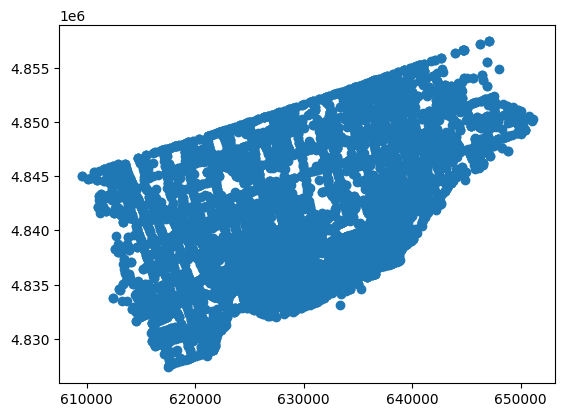

In [ ]:
points = traffic_agg.apply(lambda row: Point(row.lng, row.lat), axis = 1)
#only keep traffic 2014 and after to line up with collisions
traffic_intersections = traffic_agg.query('year >= 2014')
traffic_intersections = gpd.GeoDataFrame(traffic_agg, geometry=points)
#using metadate (filename) to initialize the data with the proper projection
traffic_intersections.crs = {'init': 'epsg:4326'}
traffic_26917 = traffic_intersections.to_crs(epsg=26917)
traffic_26917.plot()

In [ ]:
collision = gpd.read_file('/workspace/GIS_project/data/Traffic Collisions - 4326/Traffic Collisions - 4326.shp')
collision.head()

,_id1,OCC_DAT2,OCC_MON3,OCC_DOW4,OCC_YEA5,OCC_HOU6,DIVISIO7,FATALIT8,INJURY_9,FTR_COL10,PD_COLL11,HOOD_1512,NEIGHBO13,LONG_WG14,LAT_WGS15,AUTOMOB16,MOTORCY17,PASSENG18,BICYCLE19,PEDESTR20,geometry
0,1,1388552400000,January,Wednesday,2014,4,D43,0,YES,NO,NO,157,Bendale South (157),-79.25535525232044,43.75352197370893,YES,NO,YES,NO,NO,MULTIPOINT (-79.25536 43.75352)
1,2,1388552400000,January,Wednesday,2014,14,D14,0,NO,YES,NO,078,Kensington-Chinatown (78),-79.40601573209595,43.652310093633126,YES,NO,NO,NO,NO,MULTIPOINT (-79.40602 43.65231)
2,14,1388552400000,January,Wednesday,2014,1,D14,0,NO,NO,YES,086,Roncesvalles (86),-79.4286372237863,43.64220588807775,YES,NO,NO,NO,NO,MULTIPOINT (-79.42864 43.64221)
3,15,1388552400000,January,Wednesday,2014,14,D13,0,NO,NO,YES,101,Forest Hill South (101),-79.4178019320394,43.68673751185377,YES,NO,NO,NO,NO,MULTIPOINT (-79.4178 43.68674)
4,16,1388552400000,January,Wednesday,2014,2,D23,0,NO,NO,YES,007,Willowridge-Martingrove-Richview (7),-79.56313850270357,43.67441063320029,YES,NO,NO,NO,NO,MULTIPOINT (-79.56314 43.67441)


In [ ]:
#create new field that we can sum up for total crashes in a year
collision['motorcol'] = collision.apply(lambda x: 1 if x['AUTOMOB16'] == 'YES' else 0, axis=1)
#change the number of fatalities into whether a fatal crash happened or not
collision['fatals'] = collision.apply(lambda x: 1 if x['FATALIT8'] > 0 else 0, axis=1)
#binary field for whether the crash had injuries, so we can sum up total amount of collisions with injuries
collision['injuries'] = collision.apply(lambda x: 1 if x['INJURY_9'] == 'YES' else 0, axis=1)
#aggregate and group by year and geometry
collision_agg = collision.groupby(['OCC_YEA5','geometry']).agg({'HOOD_1512': pd.Series.mode,
                                                              'NEIGHBO13': pd.Series.mode,
                                                              'LONG_WG14': pd.Series.mode, 'LAT_WGS15': pd.Series.mode,
                                                              'motorcol':'sum',
                                                              'fatals':'sum',
                                                              'injuries': 'sum'})
collision_agg = collision_agg.reset_index()
collision_agg = collision_agg.rename(columns={'OCC_YEA5':'year'})
collision_agg.head()

,year,geometry,HOOD_1512,NEIGHBO13,LONG_WG14,LAT_WGS15,motorcol,fatals,injuries
0,2014,MULTIPOINT (-79.60451 43.64709),011,Eringate-Centennial-West Deane (11),-79.60450679069385,43.64709057849199,4,0,0
1,2014,MULTIPOINT (-79.60308 43.65156),011,Eringate-Centennial-West Deane (11),-79.60308289706491,43.65156185991029,6,0,1
2,2014,MULTIPOINT (-79.59005 43.64551),011,Eringate-Centennial-West Deane (11),-79.59004840351771,43.64550849335001,4,0,0
3,2014,MULTIPOINT (-79.5812 43.65095),011,Eringate-Centennial-West Deane (11),-79.58120449946392,43.65094585006111,5,0,0
4,2014,MULTIPOINT (-79.57949 43.6514),013,Etobicoke West Mall (13),-79.57948999636169,43.651403743664964,12,0,3


/workspace/GIS_project/venv/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

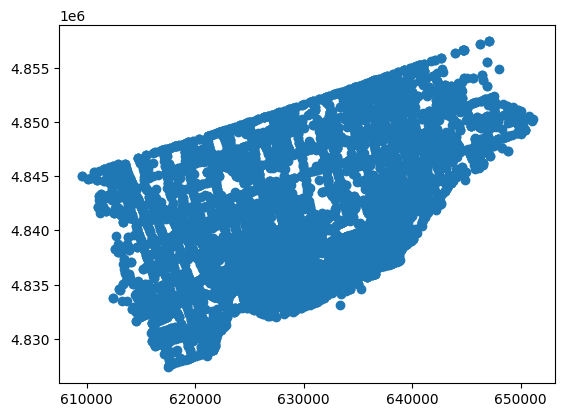

In [ ]:
#plot our new data
collision_agg = gpd.GeoDataFrame(collision_agg, geometry=points)
#using metadate (filename) to initialize the data with the proper projection
collision_agg.crs = {'init': 'epsg:4326'}
collision_26917 = collision_agg.to_crs(epsg=26917)
collision_26917.plot()

We have the three layers that we need: roads, traffic, and collisions.

We need to join collisions to roads. Since collisions are offset to the nearest intersection there will be multiple roads
sharing the same intersection counts. 

Since we do not know which direction a car was coming from for collisions we will assume that any intersection connected
to a road contributes to its overall traffic and collisions.

This can be problamatic in cases where a minor road is attached to a major road, and the majority of collision
at an intersection are caused by the major road.

Unfortunately collision did not have any geographic id's beside its geograpy point, so if the data was not entered correctly, there
may be cases where an interseciton may have multiple collision points surrounding it, even if they represent the same location.
Traffic did have geographic id's in the form of location_id, so when we aggregated points based on it, we took the most commonly
represented point position, resolving any offset issues.
As a solution we can join traffic points to collision points in order to obtain the nearest location_id, and aggregate once more
to unify them.

In [ ]:
#unifying collision points
collisions_with_traffic= traffic_26917.sjoin_nearest(collision_26917,how='inner', max_distance=10)
collisions_with_traffic.head()

,year_left,location_id,count_id,location,lng,lat,centreline_type,centreline_id,motortraf,geometry,index_right,year_right,HOOD_1512,NEIGHBO13,LONG_WG14,LAT_WGS15,motorcol,fatals,injuries
0,2010,3938,26267,DON VALLEY PKWY AT WYNFORD DR WTCS (PX 1037),-79.330889,43.726667,2.0,13453914.0,23870.0,POINT (634433.181 4842868.761),0,2014,011,Eringate-Centennial-West Deane (11),-79.60450679069385,43.64709057849199,4,0,0
1,2010,3940,25879,BLACK CREEK DR AT LAWRENCE AVE W (PX 1348),-79.494096,43.704950,2.0,13457600.0,85808.0,POINT (621331.871 4840204.966),3552,2014,006,Kingsview Village-The Westway (6),-79.56019644306934,43.69769207192131,1,0,1
1,2010,3940,25879,BLACK CREEK DR AT LAWRENCE AVE W (PX 1348),-79.494096,43.704950,2.0,13457600.0,85808.0,POINT (621331.871 4840204.966),1999,2014,078,Kensington-Chinatown (78),-79.39226264057866,43.65626849552174,1,0,0
1,2010,3940,25879,BLACK CREEK DR AT LAWRENCE AVE W (PX 1348),-79.494096,43.704950,2.0,13457600.0,85808.0,POINT (621331.871 4840204.966),1,2014,011,Eringate-Centennial-West Deane (11),-79.60308289706491,43.65156185991029,6,0,1
2,2010,3946,25409,BIRCHCLIFF AVE AT KINGSTON RD,-79.264752,43.691480,2.0,13459344.0,25126.0,POINT (639841.858 4839070.104),2996,2014,039,Bedford Park-Nortown (39),-79.42790779692702,43.71143506494508,6,0,2


In [ ]:
collisions_with_traffic.dtypes

year_left             int32
location_id           int64
count_id             object
location             object
lng                 float64
lat                 float64
centreline_type      object
centreline_id        object
motortraf           float64
geometry           geometry
index_right           int64
year_right            int64
HOOD_1512            object
NEIGHBO13            object
LONG_WG14            object
LAT_WGS15            object
motorcol              int64
fatals                int64
injuries              int64
dtype: object

In [ ]:
collisions_test = collisions_with_traffic.groupby(['year_right', 'geometry'])
collisions_with_traffic.head()

,year_left,location_id,count_id,location,lng,lat,centreline_type,centreline_id,motortraf,geometry,index_right,year_right,HOOD_1512,NEIGHBO13,LONG_WG14,LAT_WGS15,motorcol,fatals,injuries
0,2010,3938,26267,DON VALLEY PKWY AT WYNFORD DR WTCS (PX 1037),-79.330889,43.726667,2.0,13453914.0,23870.0,POINT (634433.181 4842868.761),0,2014,011,Eringate-Centennial-West Deane (11),-79.60450679069385,43.64709057849199,4,0,0
1,2010,3940,25879,BLACK CREEK DR AT LAWRENCE AVE W (PX 1348),-79.494096,43.704950,2.0,13457600.0,85808.0,POINT (621331.871 4840204.966),3552,2014,006,Kingsview Village-The Westway (6),-79.56019644306934,43.69769207192131,1,0,1
1,2010,3940,25879,BLACK CREEK DR AT LAWRENCE AVE W (PX 1348),-79.494096,43.704950,2.0,13457600.0,85808.0,POINT (621331.871 4840204.966),1999,2014,078,Kensington-Chinatown (78),-79.39226264057866,43.65626849552174,1,0,0
1,2010,3940,25879,BLACK CREEK DR AT LAWRENCE AVE W (PX 1348),-79.494096,43.704950,2.0,13457600.0,85808.0,POINT (621331.871 4840204.966),1,2014,011,Eringate-Centennial-West Deane (11),-79.60308289706491,43.65156185991029,6,0,1
2,2010,3946,25409,BIRCHCLIFF AVE AT KINGSTON RD,-79.264752,43.691480,2.0,13459344.0,25126.0,POINT (639841.858 4839070.104),2996,2014,039,Bedford Park-Nortown (39),-79.42790779692702,43.71143506494508,6,0,2


In [ ]:
#aggregate on location id and year
collisions_agg = collisions_with_traffic.groupby(['year_right', 'geometry']).aggregate({'HOOD_1512': pd.Series.mode,
                                                'NEIGHBO13': pd.Series.mode, 'location': pd.Series.mode,
                                                'lng': pd.Series.mode, 'lat': pd.Series.mode,
                                                'centreline_type': pd.Series.mode, 'centreline_id': pd.Series.mode,
                                                'motorcol':'sum',
                                                'fatals':'sum',
                                                'injuries': 'sum'})
collisions_agg = collisions_agg.reset_index()
#rename the year column
collisions_agg.rename(columns={'year_left', 'year'})

points = collisions_agg.apply(lambda row: Point(row.lng, row.lat), axis = 1)
collisions_agg = gpd.GeoDataFrame(collision_agg, geometry=points)
#using metadate (filename) to initialize the data with the proper projection
collision_agg.crs = {'init': 'epsg:4326'}
collision_26917 = collision_agg.to_crs(epsg=26917)
collision_agg.head()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()